In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("data_with_xray_type.xlsx")

In [89]:
df.head()

,id,username,status,assigned_to,created_on,created_on_ist,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,...,updated_by,deleted_by,group_id,image_type,shoot_id,rejected_by,ras_count,reporting_extended,reporting_time_limit,xray_type
0,57703,Drone_1,processed,Dr_Ravi_Chavan,2020-08-03 08:54:23,2020-08-03 14:24:23,Monday,August,2020,864,...,Dr_Ravi_Chavan,NaN,45011,xray,0,None,1,0,2020-08-03 10:01:31,Chest PA
1,57608,Gayatri_1,viewed,Dr_Ravi_Chavan,2020-08-03 07:21:04,2020-08-03 12:51:04,Monday,August,2020,771,...,Gayatri_1,NaN,44901,xray,0,None,1,0,2020-08-03 07:57:16,Chest PA
2,57614,Gayatri_1,viewed,Dr_Ravi_Chavan,2020-08-03 07:25:29,2020-08-03 12:55:29,Monday,August,2020,775,...,Gayatri_1,NaN,44907,xray,0,None,1,0,2020-08-03 09:46:14,Chest PA
3,57657,Gayatri_1,viewed,Dr_Ravi_Chavan,2020-08-03 07:40:10,2020-08-03 13:10:10,Monday,August,2020,790,...,Gayatri_1,NaN,44956,xray,0,None,1,0,2020-08-03 08:25:49,Chest PA
4,57714,GMC_1,viewed,Dr_Ravi_Chavan,2020-08-03 08:52:00,2020-08-03 14:22:00,Monday,August,2020,862,...,GMC_1,NaN,45004,xray,0,None,1,0,2020-08-03 10:01:31,Chest PA


In [90]:
df.columns

Index(['id', 'username', 'status', 'assigned_to', 'created_on',
       'created_on_ist', 'created_on_day', 'created_on_month',
       'created_on_year', 'created_on_converted_to_minutes', 'time_elapsed',
       'time_elapsed_hrs', 'time_elapsed_minutes',
       'total_time_elapsed_in_minutes', 'updated_on', 'updated_on_ist',
       'updated_by', 'deleted_by', 'group_id', 'image_type', 'shoot_id',
       'rejected_by', 'ras_count', 'reporting_extended',
       'reporting_time_limit', 'xray_type'],
      dtype='object')

In [91]:
final_df = df[['created_on_day','created_on_month','created_on_year','created_on_converted_to_minutes','xray_type','total_time_elapsed_in_minutes']]

In [92]:
final_df.head()

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes
0,Monday,August,2020,864,Chest PA,37
1,Monday,August,2020,771,Chest PA,5
2,Monday,August,2020,775,Chest PA,112
3,Monday,August,2020,790,Chest PA,16
4,Monday,August,2020,862,Chest PA,40


In [93]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40125 entries, 0 to 40124
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   created_on_day                   40125 non-null  object
 1   created_on_month                 40125 non-null  object
 2   created_on_year                  40125 non-null  int64 
 3   created_on_converted_to_minutes  40125 non-null  int64 
 4   xray_type                        40125 non-null  object
 5   total_time_elapsed_in_minutes    40125 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.8+ MB


In [94]:
final_df.xray_type.value_counts().reset_index().rename(columns={'index':'xray_type', 'xray_type':'count'})

,xray_type,count
0,Chest PA,20387
1,Chest,5549
2,Chest AP,3288
3,Spine LS,1596
4,Spine Cervical,761
...,...,...
73,Forearms Both,2
74,Arms Both,2
75,Elbows Both,2
76,Thighs Both,1


In [95]:
len(final_df.xray_type.unique())

78

In [97]:
merged_days = pd.concat([final_df,pd.get_dummies(final_df.created_on_day)],axis='columns')
merged_days.head()

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Monday,August,2020,864,Chest PA,37,0,1,0,0,0,0,0
1,Monday,August,2020,771,Chest PA,5,0,1,0,0,0,0,0
2,Monday,August,2020,775,Chest PA,112,0,1,0,0,0,0,0
3,Monday,August,2020,790,Chest PA,16,0,1,0,0,0,0,0
4,Monday,August,2020,862,Chest PA,40,0,1,0,0,0,0,0


In [98]:
merged_years = pd.concat([merged_days,pd.get_dummies(final_df.created_on_month)],axis='columns')
merged_years.head()

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes,Friday,Monday,Saturday,Sunday,...,December,February,January,July,June,March,May,November,October,September
0,Monday,August,2020,864,Chest PA,37,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Monday,August,2020,771,Chest PA,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Monday,August,2020,775,Chest PA,112,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Monday,August,2020,790,Chest PA,16,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Monday,August,2020,862,Chest PA,40,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
fnl = pd.concat([merged_years,pd.get_dummies(final_df.xray_type)],axis = 'columns')
fnl.head()

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes,Friday,Monday,Saturday,Sunday,...,Spine Dorso-Lumbar,Spine LS,TM Joint Left,TM Joint Right,Thigh Left,Thigh Right,Thighs Both,Wrist Left,Wrist Right,Wrists Both
0,Monday,August,2020,864,Chest PA,37,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Monday,August,2020,771,Chest PA,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Monday,August,2020,775,Chest PA,112,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Monday,August,2020,790,Chest PA,16,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Monday,August,2020,862,Chest PA,40,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
for i in fnl.columns:
    print(i)

created_on_day
created_on_month
created_on_year
created_on_converted_to_minutes
xray_type
total_time_elapsed_in_minutes
Friday
Monday
Saturday
Sunday
Thursday
Tuesday
Wednesday
April
August
December
February
January
July
June
March
May
November
October
September
Abdomen
Adenoid
Ankle Left
Ankle Right
Ankles Both
Arm Left
Arm Right
Arms Both
Barium
Chest
Chest AP
Chest Lateral
Chest Left
Chest PA
Chest Right
DRU
Elbow Left
Elbow Right
Elbows Both
Feet Both
Foot Left
Foot Right
Forearm Left
Forearm Right
Forearms Both
Fracture
HSG
Hand
Hand Left
Hand Right
Hands Both
Heel Left
Heel Right
Heels Both
Hip Left
Hip Right
Hips Both
IVP
Knee Left
Knee Right
Knees Both
Kub
Leg Left
Leg Right
Legs Both
Mandible Left
Mandible Right
Mandibles Both
Mastoid Left
Mastoid Right
Mastoids Both
Nasal Bones
Neck
PBH / Hip
PBH / Hip Left
PBH / Hip Right
PBH / Hips Both
Paranasal
Sacroiliac Both
Sacroiliac Left
Sacroiliac Right
Shoulder Left
Shoulder Right
Shoulders Both
Skull
Spine
Spine Cervical
Spine Dor

In [101]:
fnl.drop(columns=['created_on_day','created_on_month','xray_type'],inplace=True)

In [102]:
fnl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40125 entries, 0 to 40124
Data columns (total 100 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   created_on_year                  40125 non-null  int64
 1   created_on_converted_to_minutes  40125 non-null  int64
 2   total_time_elapsed_in_minutes    40125 non-null  int64
 3   Friday                           40125 non-null  uint8
 4   Monday                           40125 non-null  uint8
 5   Saturday                         40125 non-null  uint8
 6   Sunday                           40125 non-null  uint8
 7   Thursday                         40125 non-null  uint8
 8   Tuesday                          40125 non-null  uint8
 9   Wednesday                        40125 non-null  uint8
 10  April                            40125 non-null  uint8
 11  August                           40125 non-null  uint8
 12  December                         40125 non-nu

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [104]:
X = fnl.drop(columns='total_time_elapsed_in_minutes')
y = fnl.total_time_elapsed_in_minutes

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [106]:
print("X_train : {}".format(X_train.shape))
print("X_test : {}".format(X_test.shape))
print("y_train : {}".format(y_train.shape))
print("y_test : {}".format(y_test.shape))

X_train : (32100, 99)
X_test : (8025, 99)
y_train : (32100,)
y_test : (8025,)


In [116]:
test = pd.concat([X_test,y_test],axis="columns")

In [107]:
LinearReg = LinearRegression()
LinearReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
y_pred = LinearReg.predict(X_test)

In [109]:
diff = pd.DataFrame({'Actual test':y_test,'Predicted test':y_pred})
diff

,Actual test,Predicted test
18115,16,67.707276
11667,7,138.929208
30679,828,143.231807
29601,95,85.012047
24224,85,100.296905
...,...,...
36131,36,146.393106
1166,170,162.978023
22477,11,48.636518
20745,13,54.414067


In [127]:
pd.DataFrame(data=y_pred,index=test.index,columns=['predicted_values'])

,predicted_values
18115,67.707276
11667,138.929208
30679,143.231807
29601,85.012047
24224,100.296905
...,...
36131,146.393106
1166,162.978023
22477,48.636518
20745,54.414067


In [128]:
pd.concat([test,pd.DataFrame(data=y_pred,index=test.index,columns=['predicted_values'])],axis='columns')

,created_on_year,created_on_converted_to_minutes,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,...,TM Joint Left,TM Joint Right,Thigh Left,Thigh Right,Thighs Both,Wrist Left,Wrist Right,Wrists Both,total_time_elapsed_in_minutes,predicted_values
18115,2020,615,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,16,67.707276
11667,2020,772,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,7,138.929208
30679,2020,1138,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,828,143.231807
29601,2020,738,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,95,85.012047
24224,2020,819,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,85,100.296905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36131,2019,864,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,36,146.393106
1166,2020,1028,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,170,162.978023
22477,2020,812,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,11,48.636518
20745,2020,785,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,13,54.414067


### Try linear with pycaret

In [32]:
from pycaret.regression import *

In [33]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40125 entries, 0 to 40124
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   created_on_day                   40125 non-null  object
 1   created_on_month                 40125 non-null  object
 2   created_on_year                  40125 non-null  int64 
 3   created_on_converted_to_minutes  40125 non-null  int64 
 4   xray_type                        40125 non-null  object
 5   total_time_elapsed_in_minutes    40125 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.8+ MB


In [34]:
train_data = final_df.sample(frac=0.8,random_state=786).reset_index(drop=True)
unseen_data = final_df.drop(train_data.index).reset_index(drop=True)

In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32100 entries, 0 to 32099
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   created_on_day                   32100 non-null  object
 1   created_on_month                 32100 non-null  object
 2   created_on_year                  32100 non-null  int64 
 3   created_on_converted_to_minutes  32100 non-null  int64 
 4   xray_type                        32100 non-null  object
 5   total_time_elapsed_in_minutes    32100 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.5+ MB


In [36]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   created_on_day                   8025 non-null   object
 1   created_on_month                 8025 non-null   object
 2   created_on_year                  8025 non-null   int64 
 3   created_on_converted_to_minutes  8025 non-null   int64 
 4   xray_type                        8025 non-null   object
 5   total_time_elapsed_in_minutes    8025 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 376.3+ KB


In [37]:
base_setup = setup(data=train_data,target='total_time_elapsed_in_minutes')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,688
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(32100, 6)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [38]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,TheilSen Regressor,100.8293,247545.8191,453.3318,0.0111,1.4774,5.2689,18.7636
1,Bayesian Ridge,109.3336,247479.9123,453.5112,0.0089,1.5629,6.3255,0.5598
2,Lasso Regression,109.3112,247728.9803,453.7976,0.0072,1.5766,6.4728,0.1079
3,Elastic Net,109.9447,248331.0262,454.4775,0.0038,1.6078,6.7272,0.0764
4,Lasso Least Angle Regression,110.6165,248857.8221,455.2015,-0.0008,1.6175,6.8098,0.0555
5,Random Sample Consensus,104.8001,249369.7382,455.6501,-0.0022,1.4901,5.3283,15.9638
6,Ridge Regression,110.7788,248602.9700,455.2780,-0.0041,1.5580,6.2739,0.0457
7,Light Gradient Boosting Machine,99.1170,249257.9035,456.0990,-0.0084,1.4433,5.7703,0.2878
8,Support Vector Machine,92.1959,250369.7911,456.7961,-0.0092,1.3295,3.1452,68.4990
9,Linear Regression,110.8617,248979.0638,456.0108,-0.0107,1.5578,6.2678,0.2793


TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
                  max_subpopulation=10000, n_jobs=-1, n_subsamples=None,
                  random_state=688, tol=0.001, verbose=False)

In [53]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,99.3693,53131.0890,230.5018,-0.1217,1.5241,6.0545
1,122.7899,294042.3470,542.2567,0.0041,1.5746,5.9821
2,118.7477,367037.4697,605.8362,0.0025,1.5667,6.1694
3,104.9330,139664.6542,373.7173,0.0029,1.5319,6.2166
4,104.8338,85466.0074,292.3457,-0.0056,1.5653,6.5686
5,122.3028,829017.0486,910.5037,0.0004,1.5456,5.9565
6,105.9908,122491.5355,349.9879,0.0122,1.5382,6.3371
7,114.9996,256309.7081,506.2704,-0.0039,1.5889,7.0008
8,100.8344,39109.0313,197.7600,-0.0009,1.5502,5.9393
9,113.8159,303521.7474,550.9281,0.0026,1.5927,6.4530


In [40]:
print(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


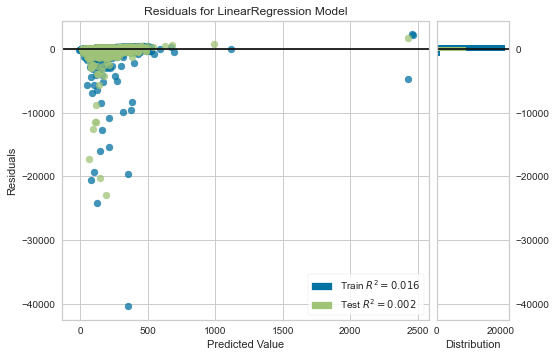

In [54]:
plot_model(lr)

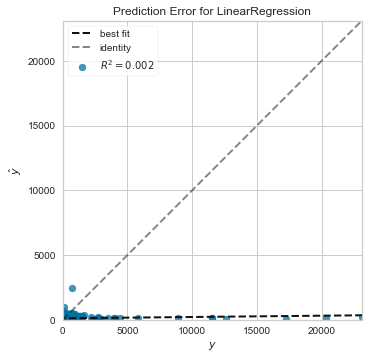

In [55]:
plot_model(lr,plot='error')

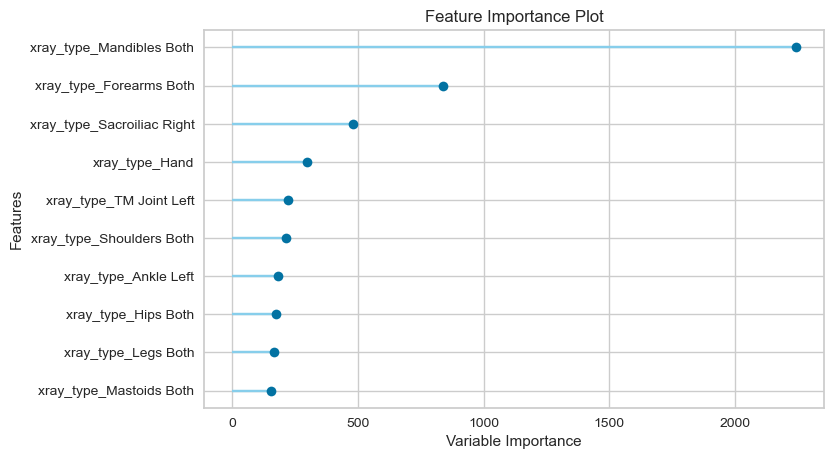

In [56]:
plot_model(lr,plot='feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

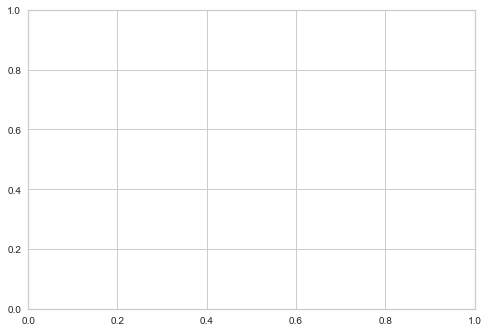

In [45]:
evaluate_model(tuned_model)

### predict on hold out data - it is some data from the train set

In [57]:
final_model = predict_model(lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,112.295,222052.0848,471.224,0.0021,1.5552,6.3546


In [58]:
final_model

,created_on_converted_to_minutes,created_on_day_Friday,created_on_day_Monday,created_on_day_Saturday,created_on_day_Sunday,created_on_day_Thursday,created_on_day_Tuesday,created_on_day_Wednesday,created_on_month_April,created_on_month_August,...,xray_type_TM Joint Left,xray_type_TM Joint Right,xray_type_Thigh Left,xray_type_Thigh Right,xray_type_Thighs Both,xray_type_Wrist Left,xray_type_Wrist Right,xray_type_Wrists Both,total_time_elapsed_in_minutes,Label
0,623.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,144.3946
1,837.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,151.8097
2,913.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,159.9572
3,990.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,192.9614
4,828.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,108.3898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9626,832.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,92.6736
9627,683.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,49.1114
9628,896.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,84.7445
9629,1317.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0,89.2762


In [76]:
unseen_predictions = predict_model(lr , data=unseen_data)
unseen_predictions.head()

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes,Label
index,,,,,,,
0,Thursday,July,2020,1344,Chest PA,64,92.4796
1,Thursday,July,2020,1164,Chest PA,80,88.4255
2,Thursday,July,2020,1218,Chest PA,33,89.6417
3,Thursday,July,2020,824,Chest PA,11278,80.7679
4,Sunday,July,2020,791,Chest PA,313,209.4909


In [151]:
dd = {
    "created_on_day":["Thursday"],
    "created_on_month":["July"],
    "created_on_year":[2020],
    "created_on_converted_to_minutes":[240],
    "xray_type":["Chest PA"],
}
data = pd.DataFrame.from_dict(data=dd)

In [152]:
predict_model(lr,data=data)

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,Label
index,,,,,,
0,Thursday,July,2020,240,Chest PA,67.6148


In [158]:
predictions = predict_model(lr, data = unseen_data)

In [ ]:
df.to_excel()

In [160]:
pd.concat([predictions.total_time_elapsed_in_minutes,predictions.Label],axis='columns').rename(columns={"total_time_elapsed_in_minutes":"Actual test","Label":"Predicted test"}).to_excel("linear_line_of_test_vs_predict.xlsx",sheet_name="with_xray_type",header=True,index=False)

In [77]:
predictions.head()

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes,Label
index,,,,,,,
0,Thursday,July,2020,1344,Chest PA,64,92.4796
1,Thursday,July,2020,1164,Chest PA,80,88.4255
2,Thursday,July,2020,1218,Chest PA,33,89.6417
3,Thursday,July,2020,824,Chest PA,11278,80.7679
4,Sunday,July,2020,791,Chest PA,313,209.4909


In [75]:
final_df[(final_df.created_on_day=="Thursday") & (final_df.created_on_month=="July") & (final_df.created_on_converted_to_minutes==824)]

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes
25087,Thursday,July,2020,824,Chest PA,14
25305,Thursday,July,2020,824,Chest PA,13
28971,Thursday,July,2020,824,Chest PA,26
32103,Thursday,July,2020,824,Chest PA,11278


array([[<AxesSubplot:title={'center':'created_on_year'}>,
        <AxesSubplot:title={'center':'created_on_converted_to_minutes'}>],
       [<AxesSubplot:title={'center':'total_time_elapsed_in_minutes'}>,
        <AxesSubplot:>]], dtype=object)

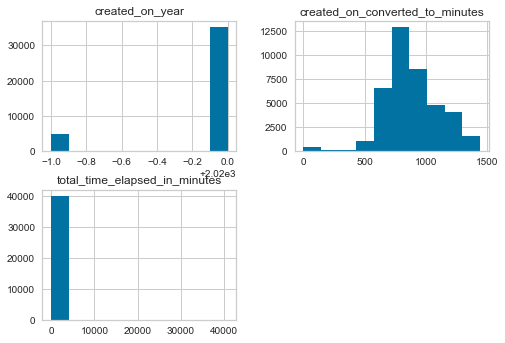

In [78]:
final_df.hist()